In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import seaborn as sns
from jax.numpy import float64
jax.config.update("jax_enable_x64", True)
fix_lock_run_csv = pd.read_csv('fix_lock_loss_vs_iter.csv')
trainable_lock_run_csv = pd.read_csv('trainable_lock_loss_vs_iter.csv')

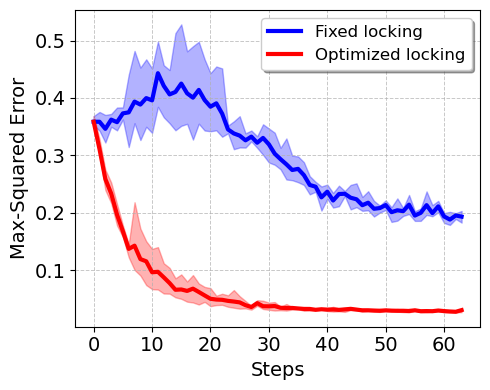

In [14]:
# Visualze Training Loss
# Remove the columns ends with _MAX or _MIN and remove Step column
def remove_redudant_columns(run_csv):
    run_csv = run_csv.loc[:,~run_csv.columns.str.endswith('_MAX')]
    run_csv = run_csv.loc[:,~run_csv.columns.str.endswith('_MIN')]
    run_csv = run_csv.loc[:,~run_csv.columns.str.endswith('Step')]
    return run_csv

# X-axis: Steps
# Y-axis: Max-Squared Error
# Line: Mean and shaded area for the min/max
# Two lines: One for each run

fix_lock_run_csv = remove_redudant_columns(fix_lock_run_csv)
trainable_lock_run_csv = remove_redudant_columns(trainable_lock_run_csv)
plt.figure(figsize=(5, 4))  # Set a larger figure size

for run, label, color in zip([fix_lock_run_csv, trainable_lock_run_csv], ["Fixed locking", "Optimized locking"], ["blue", "red"]):
    mean = run.mean(axis=1)
    run_min = run.min(axis=1)
    run_max = run.max(axis=1)

    # Plot the mean and standard deviation
    steps = np.arange(0, len(mean))

    # Plotting
    plt.plot(steps, mean, label=label, color=color, linewidth=3)  # Thicker line
    plt.fill_between(steps, run_min, run_max, color=color, alpha=0.3)

# Enhancing aesthetics
plt.xlabel('Steps', fontsize=14)  # Larger label font size
plt.ylabel('Max-Squared Error', fontsize=14)  # Larger label font size

# Adjust tick size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a grid with a finer style
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Modify legend
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.savefig('obc_loss_vs_iter.pdf', dpi=300, bbox_inches='tight')
plt.show()